In [1]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *

%load_ext autoreload
%autoreload 2

# Dataset rings5-regular

In [5]:
def train_initialy(model):
    model.train(epochs=1000, batch=True, learning_rate=0.01, save_till_best=True)

def train_model(model):
    model.train(epochs=1000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=2000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.99, save_till_best=True)
    model.train(epochs=2000, batch=True, batch_size=100, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=24, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)

In [12]:
dataset_name = 'rings5-regular'
last_layer_activation_func = Sigmoid()
loss_func = "cross_entropy"
target_precision = 1e-6
models = [
    MLP(
        architecture=MLPArchitecture(2, [80], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        initializer=XavierNormalInitializer(),
        target_precision=target_precision,
        name="[80] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [40, 40], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[40, 40] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [20, 40, 20], 5),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[20, 40, 20] - sigmoid"
    ),
]

for model in models:
    print(f"Training model: {model.name}")

Training model: [80] - tanh
Training model: [40, 40] - tanh
Training model: [20, 40, 20] - sigmoid


# First look at the dataset

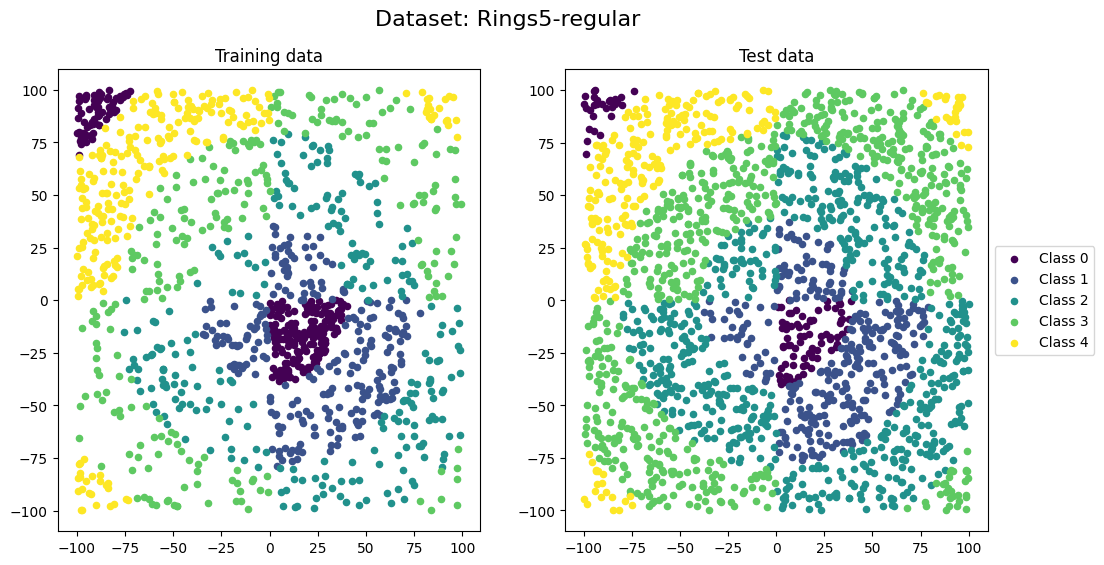

In [13]:
models[0].plot_classification_data()

### Model 1: `[80] - tanh`

In [9]:
model1 = models[0]
train_initialy(model1)

Training from age 0: (best_loss_test: 0.611375, loss_test: 1.004251): 100%|██████████| 1000/1000 [00:07<00:00, 133.57it/s]

--------------------
Reverting to best model at age 2
Loss on train set: 0.575701	Loss on test set: 0.611375
--------------------
Model training finished at age 2 with loss 0.611375 on test set


Model: [80] - tanh
Age: 2
Train Loss: 0.575701
Test Loss: 0.611375
Accuracy: 0.2745
F1 Score: 0.2395
Model made 549 / 2000 correct predictions on the test set.
There were 1451 incorrect predictions.


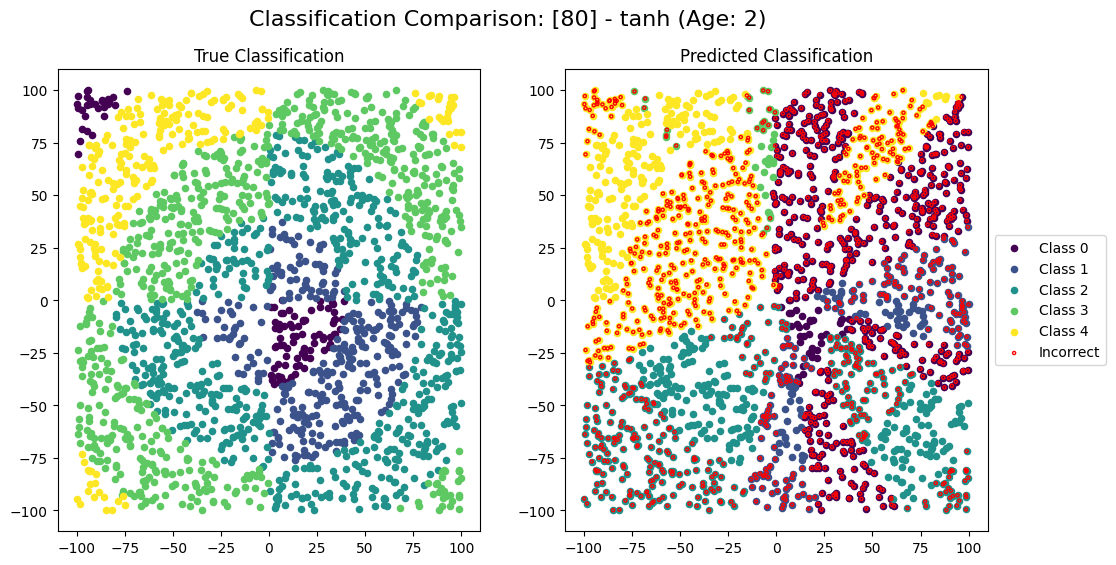

In [11]:
model1.plot_classification_comparison()

In [15]:
train_model(model1)

Training from age 2: (best_loss_test: 0.351291, loss_test: 0.387826): 100%|██████████| 1000/1000 [00:08<00:00, 120.73it/s]


--------------------
Reverting to best model at age 980
Loss on train set: 0.208377	Loss on test set: 0.351291
--------------------
Model training finished at age 980 with loss 0.351291 on test set


Training from age 980: (best_loss_test: 0.2215, loss_test: 0.298727): 100%|██████████| 2000/2000 [00:16<00:00, 121.60it/s]  


--------------------
Reverting to best model at age 2867
Loss on train set: 0.104378	Loss on test set: 0.2215
--------------------
Model training finished at age 2867 with loss 0.2215 on test set


Training from age 2867: (best_loss_test: 0.220842, loss_test: 0.292051): 100%|██████████| 1000/1000 [00:14<00:00, 67.22it/s]


--------------------
Reverting to best model at age 3757
Loss on train set: 0.087283	Loss on test set: 0.220842
--------------------
Model training finished at age 3757 with loss 0.220842 on test set


Training from age 3757: (best_loss_test: 0.210508, loss_test: 0.247371): 100%|██████████| 2000/2000 [00:14<00:00, 138.38it/s]


--------------------
Reverting to best model at age 4668
Loss on train set: 0.076958	Loss on test set: 0.210508
--------------------
Model training finished at age 4668 with loss 0.210508 on test set


Training from age 4668: (best_loss_test: 0.206282, loss_test: 0.280754): 100%|██████████| 1000/1000 [00:09<00:00, 102.97it/s]


--------------------
Reverting to best model at age 5544
Loss on train set: 0.073244	Loss on test set: 0.206282
--------------------
Model training finished at age 5544 with loss 0.206282 on test set


Training from age 5544: (best_loss_test: 0.205392, loss_test: 0.358614): 100%|██████████| 1000/1000 [00:14<00:00, 69.83it/s]

--------------------
Reverting to best model at age 5719
Loss on train set: 0.07682	Loss on test set: 0.205392
--------------------
Model training finished at age 5719 with loss 0.205392 on test set


Model: [80] - tanh
Age: 5719
Train Loss: 0.07682
Test Loss: 0.205392
Accuracy: 0.9095
F1 Score: 0.9095
Model made 1819 / 2000 correct predictions on the test set.
There were 181 incorrect predictions.


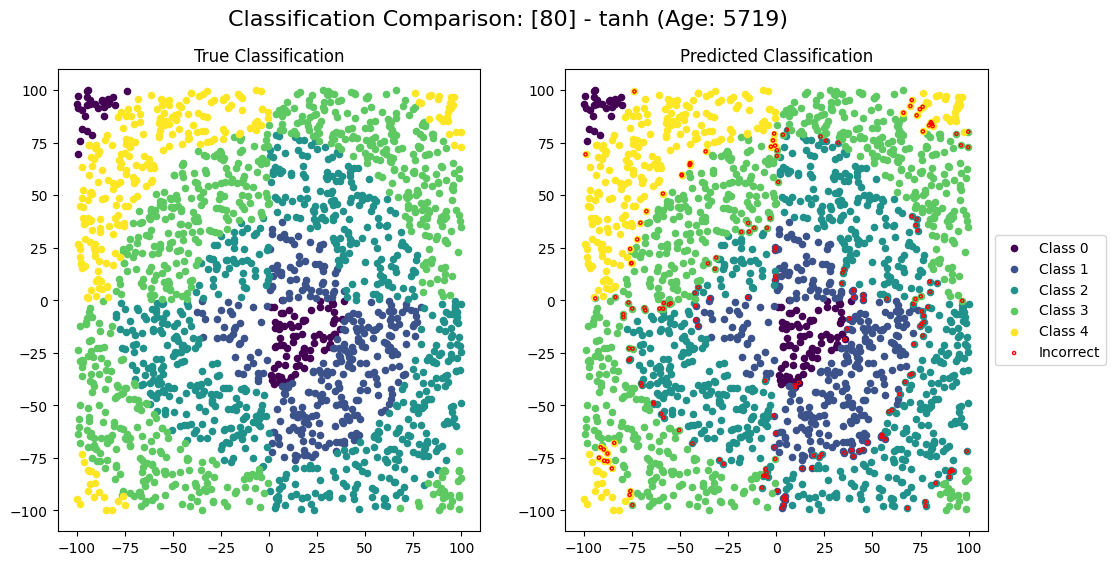

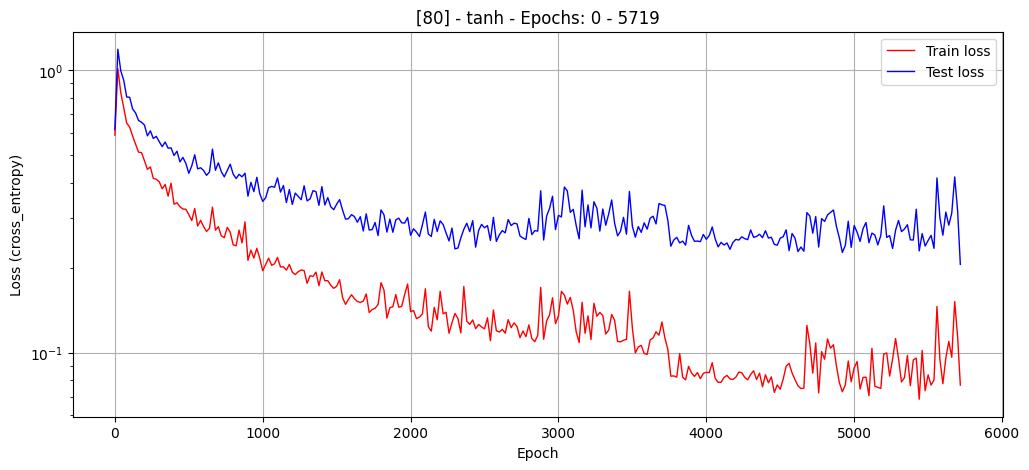

In [ ]:
model1.plot_classification_comparison()
model1.plot_history(smoothing_interval=20)

### Model 2: `[40, 40] - tanh`

In [23]:
model2 = models[1]
train_initialy(model1)

Training from age 5719: (best_loss_test: 0.205392, loss_test: 0.425414): 100%|██████████| 1000/1000 [00:07<00:00, 132.27it/s]

--------------------
Reverting to best model at age 5719
Loss on train set: 0.07682	Loss on test set: 0.205392
--------------------
Model training finished at age 5719 with loss 0.205392 on test set


Model: [40, 40] - tanh
Age: 0
Train Loss: 0.753275
Test Loss: 0.762195
Accuracy: 0.217
F1 Score: 0.2232
Model made 434 / 2000 correct predictions on the test set.
There were 1566 incorrect predictions.


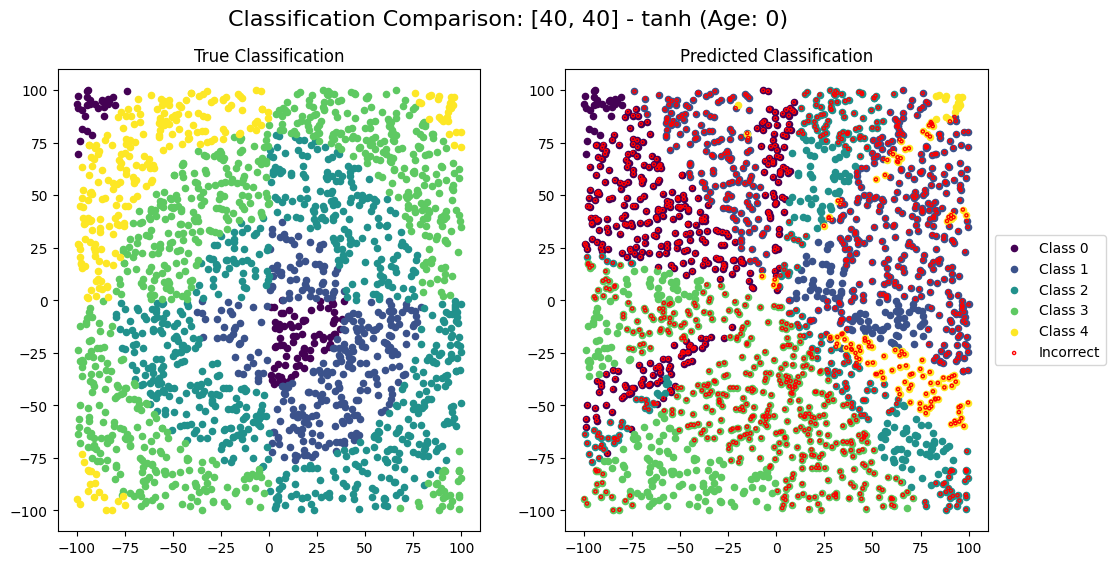

In [24]:
model2.plot_classification_comparison()

In [25]:
train_model(model2)

Training from age 0: (best_loss_test: 0.175728, loss_test: 0.265943): 100%|██████████| 1000/1000 [00:08<00:00, 114.82it/s]


--------------------
Reverting to best model at age 846
Loss on train set: 0.138384	Loss on test set: 0.175728
--------------------
Model training finished at age 846 with loss 0.175728 on test set


Training from age 846: (best_loss_test: 0.175728, loss_test: 0.234836): 100%|██████████| 2000/2000 [00:17<00:00, 114.63it/s]


--------------------
Reverting to best model at age 846
Loss on train set: 0.138384	Loss on test set: 0.175728
--------------------
Model training finished at age 846 with loss 0.175728 on test set


Training from age 846: (best_loss_test: 0.175728, loss_test: 0.247382): 100%|██████████| 1000/1000 [00:18<00:00, 53.29it/s]


--------------------
Reverting to best model at age 846
Loss on train set: 0.138384	Loss on test set: 0.175728
--------------------
Model training finished at age 846 with loss 0.175728 on test set


Training from age 846: (best_loss_test: 0.167029, loss_test: 0.229083): 100%|██████████| 2000/2000 [00:14<00:00, 134.50it/s]


--------------------
Reverting to best model at age 1402
Loss on train set: 0.119365	Loss on test set: 0.167029
--------------------
Model training finished at age 1402 with loss 0.167029 on test set


Training from age 1402: (best_loss_test: 0.167029, loss_test: 0.266311): 100%|██████████| 1000/1000 [00:11<00:00, 88.54it/s]


--------------------
Reverting to best model at age 1402
Loss on train set: 0.119365	Loss on test set: 0.167029
--------------------
Model training finished at age 1402 with loss 0.167029 on test set


Training from age 1402: (best_loss_test: 0.167029, loss_test: 0.260824): 100%|██████████| 1000/1000 [00:18<00:00, 54.02it/s]

--------------------
Reverting to best model at age 1402
Loss on train set: 0.119365	Loss on test set: 0.167029
--------------------
Model training finished at age 1402 with loss 0.167029 on test set


Model: [40, 40] - tanh
Age: 1402
Train Loss: 0.119365
Test Loss: 0.167029
Accuracy: 0.9385
F1 Score: 0.9386
Model made 1877 / 2000 correct predictions on the test set.
There were 123 incorrect predictions.


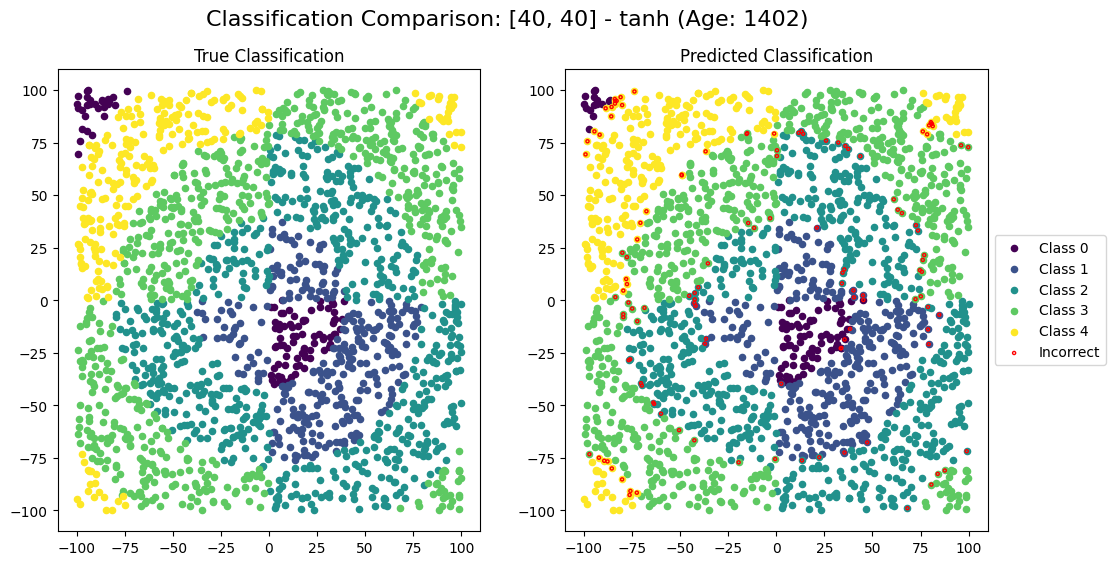

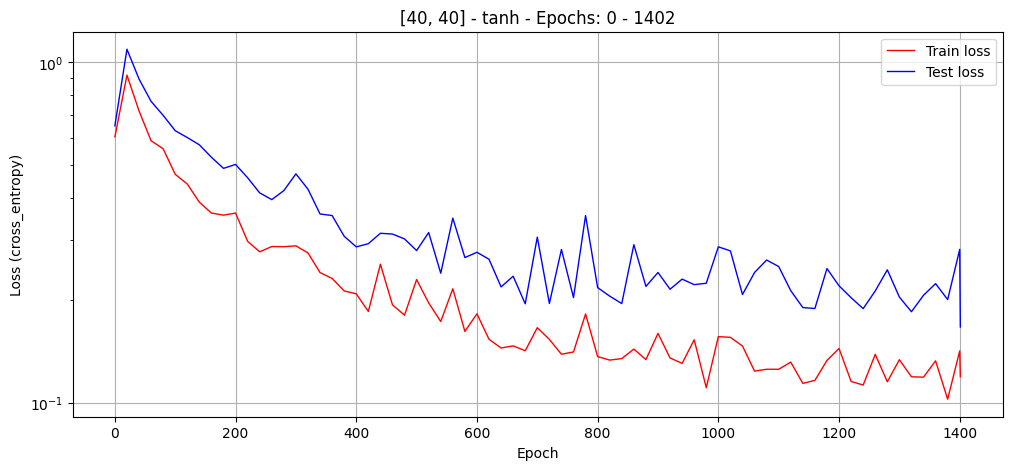

In [26]:
model2.plot_classification_comparison()
model2.plot_history(smoothing_interval=20)

### Model 3: `[20, 40, 20] - sigmoid`

In [27]:
model3 = models[2]
train_initialy(model1)

Training from age 5719: (best_loss_test: 0.205392, loss_test: 0.411116): 100%|██████████| 1000/1000 [00:07<00:00, 132.36it/s]

--------------------
Reverting to best model at age 5719
Loss on train set: 0.07682	Loss on test set: 0.205392
--------------------
Model training finished at age 5719 with loss 0.205392 on test set


Model: [20, 40, 20] - sigmoid
Age: 0
Train Loss: 0.718244
Test Loss: 0.730216
Accuracy: 0.1515
F1 Score: 0.1679
Model made 303 / 2000 correct predictions on the test set.
There were 1697 incorrect predictions.


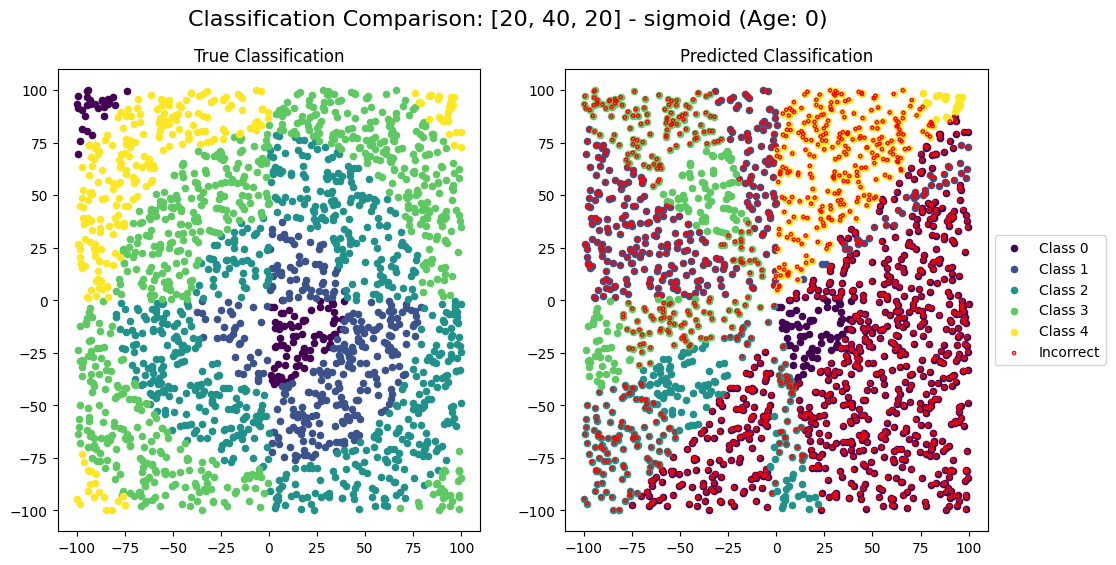

In [28]:
model3.plot_classification_comparison()

In [29]:
train_model(model3)

Training from age 0: (best_loss_test: 0.231681, loss_test: 0.382707): 100%|██████████| 1000/1000 [00:09<00:00, 107.57it/s]


--------------------
Reverting to best model at age 743
Loss on train set: 0.175959	Loss on test set: 0.231681
--------------------
Model training finished at age 743 with loss 0.231681 on test set


Training from age 743: (best_loss_test: 0.176877, loss_test: 0.200987): 100%|██████████| 2000/2000 [00:19<00:00, 101.32it/s]


--------------------
Reverting to best model at age 2723
Loss on train set: 0.109885	Loss on test set: 0.176877
--------------------
Model training finished at age 2723 with loss 0.176877 on test set


Training from age 2723: (best_loss_test: 0.1614, loss_test: 0.27525): 100%|██████████| 1000/1000 [00:21<00:00, 46.09it/s]  


--------------------
Reverting to best model at age 2983
Loss on train set: 0.114027	Loss on test set: 0.1614
--------------------
Model training finished at age 2983 with loss 0.1614 on test set


Training from age 2983: (best_loss_test: 0.130242, loss_test: 0.17799): 100%|██████████| 2000/2000 [00:15<00:00, 128.42it/s] 


--------------------
Reverting to best model at age 3153
Loss on train set: 0.091432	Loss on test set: 0.130242
--------------------
Model training finished at age 3153 with loss 0.130242 on test set


Training from age 3153: (best_loss_test: 0.130242, loss_test: 0.186107): 100%|██████████| 1000/1000 [00:13<00:00, 74.93it/s]


--------------------
Reverting to best model at age 3153
Loss on train set: 0.091432	Loss on test set: 0.130242
--------------------
Model training finished at age 3153 with loss 0.130242 on test set


Training from age 3153: (best_loss_test: 0.130242, loss_test: 0.227783): 100%|██████████| 1000/1000 [00:21<00:00, 45.72it/s]

--------------------
Reverting to best model at age 3153
Loss on train set: 0.091432	Loss on test set: 0.130242
--------------------
Model training finished at age 3153 with loss 0.130242 on test set


Model: [20, 40, 20] - sigmoid
Age: 3153
Train Loss: 0.091432
Test Loss: 0.130242
Accuracy: 0.9505
F1 Score: 0.9505
Model made 1901 / 2000 correct predictions on the test set.
There were 99 incorrect predictions.


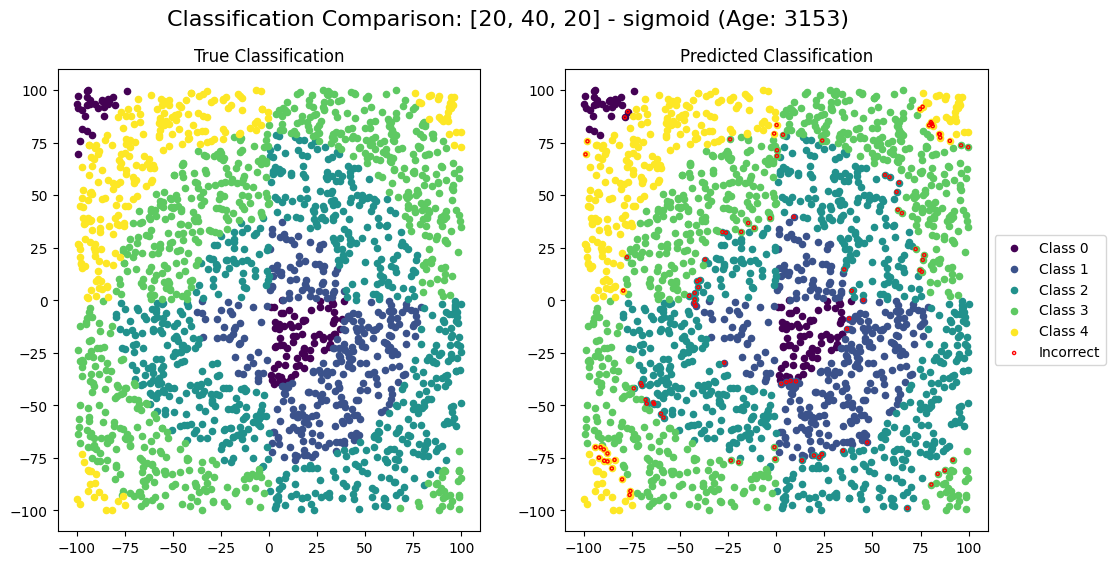

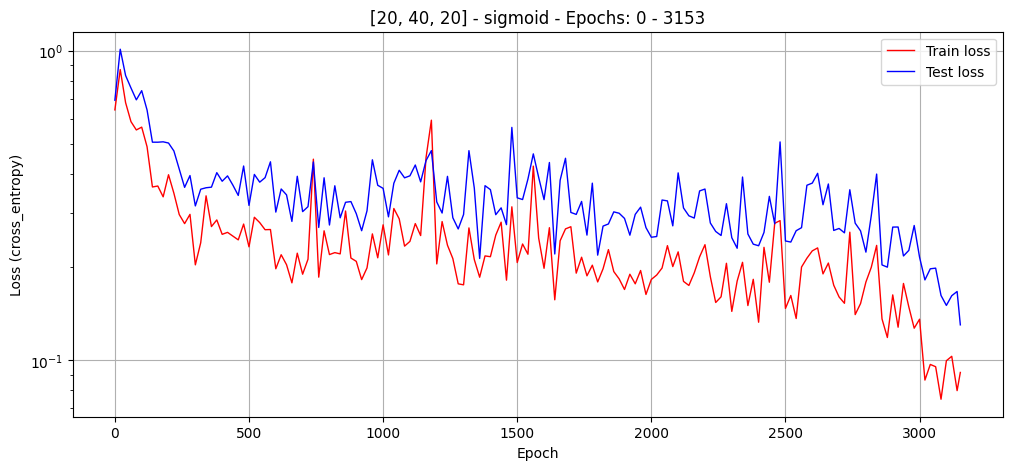

In [30]:
model3.plot_classification_comparison()
model3.plot_history(smoothing_interval=20)